### Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def perceptron(df,learning_rate=1,print_step=False,draw_step=False,display=False):
    columns=df.columns
    classes=df[columns[2]].values
    a=np.zeros((1,(len(df.columns))))
    df['aug']=np.ones(len(df.index))
    df.loc[df[columns[2]]==classes[1],[columns[0],columns[1],"aug"]]=-df.loc[df[columns[2]]==classes[1],[columns[0],columns[1],"aug"]]
    y=df.drop(columns[2],axis=1)
    n=len(df.index)
    k=0
    count=0
    iterations=0
    while(True):
        if(print_step):
            print(f"{iterations}: (a.T)*y={(a@y.iloc[k])[0]}")
        if(a@y.iloc[k]<=0):
            a=(a+(learning_rate*y.iloc[k].to_numpy()))
            if(print_step):
                print(f"\ta=a+(rate*y) = {a[0]}")
            if(draw_step):
                plt.axline([0,-a[0,2]/a[0,1]],[1,-(a[0,0]+a[0,2])/a[0,1]],color="pink",linewidth=2)
                plt.xlabel(df.columns[0])
                plt.ylabel(df.columns[1])
                plt.legend()
            count=0
        else:
            count+=1
        if(count>=n):
            break
        iterations+=1
        k=(k+1)%n
    print(f"{iterations} Iterations")
    print(f"a={a[0]}")
    return a

In [3]:
temp={
    'x1':[0.5,1,0.5,1,1.5,4.5,5,4.5,5.5],
    'x2':[3.0,3.0,2.5,2.5,2.5,1,1,0.5,0.5],
    'class':[2,2,2,2,2,1,1,1,1]
}

df=pd.DataFrame(temp)
display(df)

,x1,x2,class
0,0.5,3.0,2
1,1.0,3.0,2
2,0.5,2.5,2
3,1.0,2.5,2
4,1.5,2.5,2
5,4.5,1.0,1
6,5.0,1.0,1
7,4.5,0.5,1
8,5.5,0.5,1


0: (a.T)*y=0.0
	a=a+(rate*y) = [-0.5 -3.  -1. ]
1: (a.T)*y=10.5
2: (a.T)*y=8.75
3: (a.T)*y=9.0
4: (a.T)*y=9.25
5: (a.T)*y=-6.25
	a=a+(rate*y) = [ 4. -2.  0.]
6: (a.T)*y=18.0
7: (a.T)*y=17.0
8: (a.T)*y=21.0
9: (a.T)*y=4.0
10: (a.T)*y=2.0
11: (a.T)*y=3.0
12: (a.T)*y=1.0
13: (a.T)*y=-1.0
	a=a+(rate*y) = [ 2.5 -4.5 -1. ]
14: (a.T)*y=5.75
15: (a.T)*y=7.0
16: (a.T)*y=8.0
17: (a.T)*y=10.5
18: (a.T)*y=13.25
19: (a.T)*y=12.0
20: (a.T)*y=11.0
21: (a.T)*y=9.75
22: (a.T)*y=8.5
22 Iterations
a=[ 2.5 -4.5 -1. ]


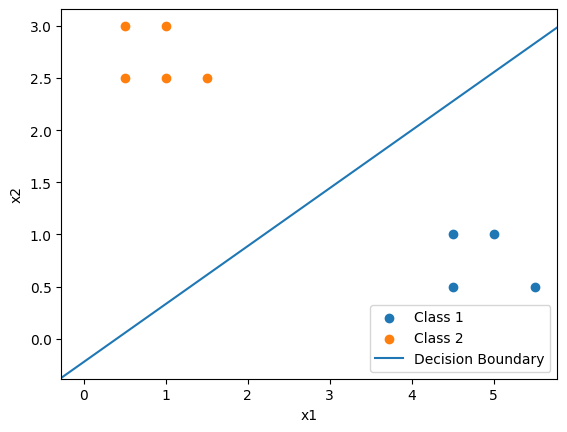

In [4]:
a=perceptron(df.copy(),print_step=True)

plt.scatter(df[df["class"]==1]["x1"],df[df["class"]==1]["x2"],label="Class 1")
plt.scatter(df[df["class"]==2]["x1"],df[df["class"]==2]["x2"],label="Class 2")

plt.axline([0,-a[0,2]/a[0,1]],[1,-(a[0,0]+a[0,2])/a[0,1]],label="Decision Boundary")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Question 2

In [5]:
temp={
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'class':[0,0,0,1]
}

df=pd.DataFrame(temp)
display(df)

,x1,x2,class
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


0: (a.T)*y=0.0
	a=a+(rate*y) = [ 0.  0. -1.]
1: (a.T)*y=1.0
2: (a.T)*y=1.0
3: (a.T)*y=-1.0
	a=a+(rate*y) = [1. 1. 0.]
4: (a.T)*y=0.0
	a=a+(rate*y) = [ 1.  1. -1.]
5: (a.T)*y=0.0
	a=a+(rate*y) = [ 1.  0. -2.]
6: (a.T)*y=1.0
7: (a.T)*y=-1.0
	a=a+(rate*y) = [ 2.  1. -1.]
8: (a.T)*y=1.0
9: (a.T)*y=0.0
	a=a+(rate*y) = [ 2.  0. -2.]
10: (a.T)*y=0.0
	a=a+(rate*y) = [ 1.  0. -3.]
11: (a.T)*y=-2.0
	a=a+(rate*y) = [ 2.  1. -2.]
12: (a.T)*y=2.0
13: (a.T)*y=1.0
14: (a.T)*y=0.0
	a=a+(rate*y) = [ 1.  1. -3.]
15: (a.T)*y=-1.0
	a=a+(rate*y) = [ 2.  2. -2.]
16: (a.T)*y=2.0
17: (a.T)*y=0.0
	a=a+(rate*y) = [ 2.  1. -3.]
18: (a.T)*y=1.0
19: (a.T)*y=0.0
	a=a+(rate*y) = [ 3.  2. -2.]
20: (a.T)*y=2.0
21: (a.T)*y=0.0
	a=a+(rate*y) = [ 3.  1. -3.]
22: (a.T)*y=0.0
	a=a+(rate*y) = [ 2.  1. -4.]
23: (a.T)*y=-1.0
	a=a+(rate*y) = [ 3.  2. -3.]
24: (a.T)*y=3.0
25: (a.T)*y=1.0
26: (a.T)*y=0.0
	a=a+(rate*y) = [ 2.  2. -4.]
27: (a.T)*y=0.0
	a=a+(rate*y) = [ 3.  3. -3.]
28: (a.T)*y=3.0
29: (a.T)*y=0.0
	a=a+(rate*y) = [ 

C:\Users\Falcon\AppData\Local\Temp\ipykernel_3616\404148413.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  plt.axline([0,-a[0,2]/a[0,1]],[1,-(a[0,0]+a[0,2])/a[0,1]],color="pink",linewidth=2)
C:\Users\Falcon\AppData\Local\Temp\ipykernel_3616\404148413.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Falcon\AppData\Local\Temp\ipykernel_3616\404148413.py:20: RuntimeWarning: invalid value encountered in scalar divide
  plt.axline([0,-a[0,2]/a[0,1]],[1,-(a[0,0]+a[0,2])/a[0,1]],color="pink",linewidth=2)
c:\Users\Falcon\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\lines.py:1507: RuntimeWarning: invalid value encountered in scalar subtract
  dy = y2 - y1


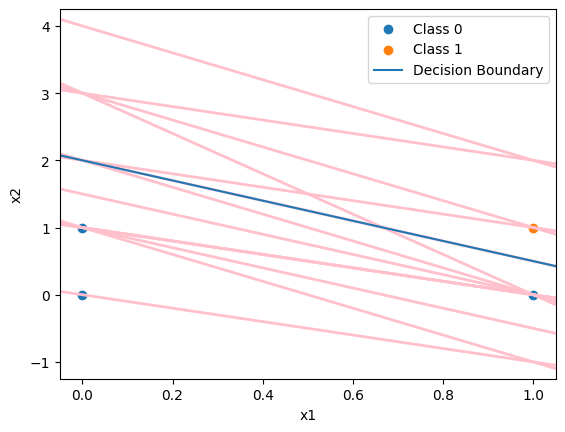

In [6]:
a=perceptron(df.copy(),print_step=True,draw_step=True)

plt.scatter(df[df["class"]==0]["x1"],df[df["class"]==0]["x2"],label="Class 0")
plt.scatter(df[df["class"]==1]["x1"],df[df["class"]==1]["x2"],label="Class 1")

plt.axline([0,-a[0,2]/a[0,1]],[1,-(a[0,0]+a[0,2])/a[0,1]],label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### Question 3

In [7]:
temp={
    'x1':[2,-1,-1,0,1,-1,1,-1],
    'x2':[2,-3,2,-1,3,-2,-2,-1],
    'class':[1,0,1,0,1,0,0,1]
}

df=pd.DataFrame(temp)
display(df)

,x1,x2,class
0,2,2,1
1,-1,-3,0
2,-1,2,1
3,0,-1,0
4,1,3,1
5,-1,-2,0
6,1,-2,0
7,-1,-1,1


51 Iterations
a=[-0.002  0.003  0.002]


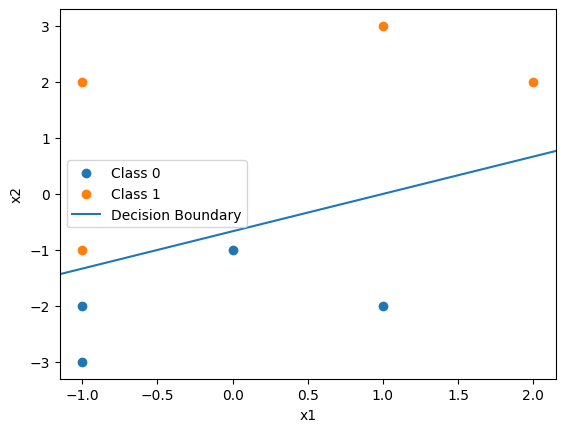

39 Iterations
a=[-0.01  0.03  0.02]


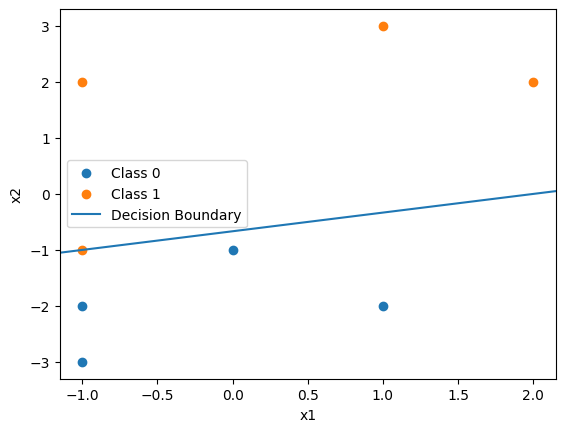

51 Iterations
a=[-1.   1.5  1. ]


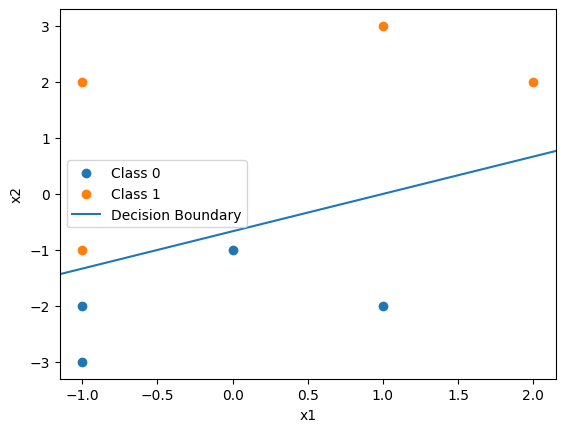

In [8]:
a=perceptron(df.copy(),0.001)
plt.scatter(df[df["class"]==0]["x1"],df[df["class"]==0]["x2"],label="Class 0")
plt.scatter(df[df["class"]==1]["x1"],df[df["class"]==1]["x2"],label="Class 1")

plt.axline([0,-a[0,2]/a[0,1]],[1,-(a[0,0]+a[0,2])/a[0,1]],label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

a=perceptron(df.copy(),0.01)
plt.scatter(df[df["class"]==0]["x1"],df[df["class"]==0]["x2"],label="Class 0")
plt.scatter(df[df["class"]==1]["x1"],df[df["class"]==1]["x2"],label="Class 1")

plt.axline([0,-a[0,2]/a[0,1]],[1,-(a[0,0]+a[0,2])/a[0,1]],label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

a=perceptron(df.copy(),0.5)
plt.scatter(df[df["class"]==0]["x1"],df[df["class"]==0]["x2"],label="Class 0")
plt.scatter(df[df["class"]==1]["x1"],df[df["class"]==1]["x2"],label="Class 1")

plt.axline([0,-a[0,2]/a[0,1]],[1,-(a[0,0]+a[0,2])/a[0,1]],label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### Question 4

200 Iterations
a=[ 0.032 -0.037 -0.01 ]


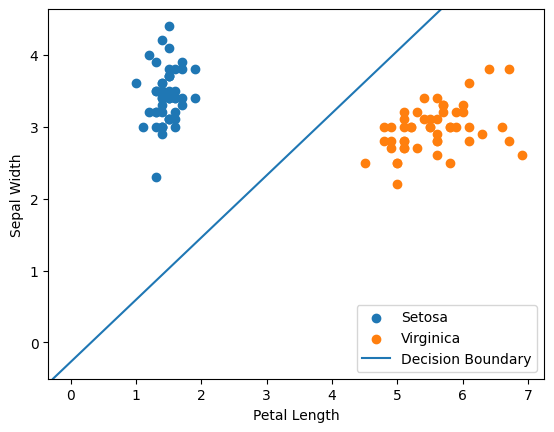

In [9]:
iris_df=pd.read_csv('./iris.csv')

iris_df=(iris_df[iris_df['variety']!='Versicolor']).loc[:,['petal.length','sepal.width','variety']]

a=perceptron(iris_df.copy(),0.01)

plt.scatter(iris_df[iris_df["variety"]=="Setosa"]["petal.length"],iris_df[iris_df["variety"]=="Setosa"]["sepal.width"],label="Setosa")
plt.scatter(iris_df[iris_df["variety"]=="Virginica"]["petal.length"],iris_df[iris_df["variety"]=="Virginica"]["sepal.width"],label="Virginica")

plt.axline([0,-a[0,2]/a[0,1]],[1,-(a[0,0]+a[0,2])/a[0,1]],label="Decision Boundary")
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()